<a href="https://colab.research.google.com/github/AT200210/Data_Science/blob/main/ML/KNN_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
data=pd.read_csv('diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
correlation=data.corr()
correlation['Outcome']

,Outcome
Pregnancies,0.221898
Glucose,0.466581
BloodPressure,0.065068
SkinThickness,0.074752
Insulin,0.130548
BMI,0.292695
DiabetesPedigreeFunction,0.173844
Age,0.238356
Outcome,1.000000


In [ ]:
scaler=StandardScaler()
scaler.fit(data.drop('Outcome',axis=1))
scaled_features=scaler.transform(data.drop('Outcome',axis=1))
df_feat=pd.DataFrame(scaled_features,columns=data.columns[:-1])
df_feat

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732


In [ ]:
X=df_feat
y=data['Outcome']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [ ]:
model=KNeighborsClassifier(n_neighbors=11,weights='uniform')
model.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=11)

In [ ]:
y_pred=model.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.81      0.79       100
           1       0.62      0.57      0.60        54

    accuracy                           0.73       154
   macro avg       0.70      0.69      0.70       154
weighted avg       0.72      0.73      0.72       154



<Axes: >

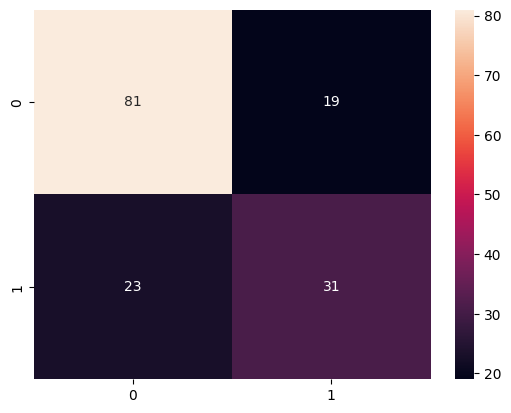

In [ ]:
cf=confusion_matrix(y_test,y_pred)
sns.heatmap(cf,annot=True)

In [2]:
training=pd.read_csv('flight_delays_train.csv')
training

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732,N
1,c-4,c-20,c-3,1548,US,PIT,MCO,834,N
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416,N
3,c-11,c-25,c-6,1015,OO,DEN,MEM,872,N
4,c-10,c-7,c-6,1828,WN,MDW,OMA,423,Y
...,...,...,...,...,...,...,...,...,...
99995,c-5,c-4,c-3,1618,OO,SFO,RDD,199,N
99996,c-1,c-18,c-3,804,CO,EWR,DAB,884,N
99997,c-1,c-24,c-2,1901,NW,DTW,IAH,1076,N
99998,c-4,c-27,c-4,1515,MQ,DFW,GGG,140,N


In [3]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Month              100000 non-null  object
 1   DayofMonth         100000 non-null  object
 2   DayOfWeek          100000 non-null  object
 3   DepTime            100000 non-null  int64 
 4   UniqueCarrier      100000 non-null  object
 5   Origin             100000 non-null  object
 6   Dest               100000 non-null  object
 7   Distance           100000 non-null  int64 
 8   dep_delayed_15min  100000 non-null  object
dtypes: int64(2), object(7)
memory usage: 6.9+ MB


In [5]:
training['Month'].value_counts()

,count
Month,
c-8,8830
c-7,8706
c-3,8595
c-5,8543
c-6,8414
c-4,8408
c-10,8405
c-12,8265
c-11,8178


In [6]:
training['DayofMonth'].value_counts()

,count
DayofMonth,
c-1,3399
c-20,3380
c-6,3377
c-22,3374
c-14,3366
c-17,3347
c-10,3342
c-27,3330
c-28,3321


In [7]:
training['DayOfWeek'].value_counts()

,count
DayOfWeek,
c-4,14736
c-5,14657
c-2,14604
c-1,14569
c-3,14508
c-7,14097
c-6,12829


In [11]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
training['Origin']=encoder.fit_transform(training['Origin'])
training['Dest']=encoder.fit_transform(training['Dest'])
training['DayOfWeek']=encoder.fit_transform(training['DayOfWeek'])
training['DayofMonth']=encoder.fit_transform(training['DayofMonth'])
training['Month']=encoder.fit_transform(training['Month'])
training['UniqueCarrier']=encoder.fit_transform(training['UniqueCarrier'])
training['dep_delayed_15min']=encoder.fit_transform(training['dep_delayed_15min'])

In [12]:
training

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,10,13,6,1934,0,18,78,732,0
1,6,12,2,1548,18,217,171,834,0
2,11,11,4,1422,20,228,59,416,0
3,2,17,5,1015,15,78,175,872,0
4,1,28,5,1828,19,174,199,423,1
...,...,...,...,...,...,...,...,...,...
99995,7,25,2,1618,15,246,224,199,0
99996,0,9,2,804,4,92,72,884,0
99997,0,16,1,1901,13,85,131,1076,0
99998,6,19,3,1515,12,79,107,140,0


In [19]:
training['dep_delayed_15min'].value_counts()

,count
dep_delayed_15min,
0,80956
1,19044


In [13]:
correlation=training.corr()
correlation['dep_delayed_15min']

,dep_delayed_15min
Month,0.003802
DayofMonth,-0.008206
DayOfWeek,0.010439
DepTime,0.243819
UniqueCarrier,-0.001706
Origin,-0.014062
Dest,0.001610
Distance,-0.002734
dep_delayed_15min,1.000000


In [14]:
X=training.drop('dep_delayed_15min',axis=1)
y=training['dep_delayed_15min']

In [50]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
X_smote,y_smote=smote.fit_resample(X,y)

In [51]:
y_smote.value_counts()

,count
dep_delayed_15min,
0,80956
1,80956


In [52]:
X_train, X_val, y_train, y_val = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

In [53]:
model=KNeighborsClassifier(n_neighbors=5,metric='minkowski')
model.fit(X_train,y_train)

KNeighborsClassifier()

In [54]:
y_pred=model.predict(X_val)
y_pred

array([0, 1, 1, ..., 1, 1, 0])

In [60]:
y_train_p=model.predict(X_train)
print(classification_report(y_train,y_train_p))

              precision    recall  f1-score   support

           0       0.94      0.81      0.87     64939
           1       0.83      0.95      0.89     64590

    accuracy                           0.88    129529
   macro avg       0.89      0.88      0.88    129529
weighted avg       0.89      0.88      0.88    129529



In [55]:
print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.70      0.78     16017
           1       0.76      0.90      0.82     16366

    accuracy                           0.80     32383
   macro avg       0.81      0.80      0.80     32383
weighted avg       0.81      0.80      0.80     32383



In [56]:
testing=pd.read_csv('flight_delays_test.csv')
testing

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance
0,c-7,c-25,c-3,615,YV,MRY,PHX,598
1,c-4,c-17,c-2,739,WN,LAS,HOU,1235
2,c-12,c-2,c-7,651,MQ,GSP,ORD,577
3,c-3,c-25,c-7,1614,WN,BWI,MHT,377
4,c-6,c-6,c-3,1505,UA,ORD,STL,258
...,...,...,...,...,...,...,...,...
99995,c-6,c-5,c-2,852,WN,CRP,HOU,187
99996,c-11,c-24,c-6,1446,UA,ORD,LAS,1515
99997,c-1,c-30,c-2,1509,OO,ORD,SGF,438
99998,c-1,c-5,c-5,804,DL,LGA,ATL,761


In [57]:
encoder=LabelEncoder()
testing['Origin']=encoder.fit_transform(testing['Origin'])
testing['Dest']=encoder.fit_transform(testing['Dest'])
testing['DayOfWeek']=encoder.fit_transform(testing['DayOfWeek'])
testing['DayofMonth']=encoder.fit_transform(testing['DayofMonth'])
testing['Month']=encoder.fit_transform(testing['Month'])
testing['UniqueCarrier']=encoder.fit_transform(testing['UniqueCarrier'])


In [58]:
testing.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance
0,9,17,2,615,19,194,217,598
1,6,8,1,739,17,155,129,1235
2,3,11,6,651,11,121,208,577
3,5,17,6,1614,17,49,183,377
4,8,27,2,1505,15,209,270,258


In [59]:
y_new=model.predict(testing)
y_new

array([0, 0, 0, ..., 0, 0, 0])

ValueError: Found input variables with inconsistent numbers of samples: [20000, 100000]